# Chapter08 Regression

> https://baike.baidu.com/item/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/8190345
> 
> 线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布

回归的一个目的是根据数值型变量进行预测。

平方误差：

${\sum^m_{i=1}(y_i-x_i^Tw)^2}$

其中， ${x_i^Tw}$ 是回归预测值 ${\hat y}$

对于线性回归而言，最重要的是根据输入值解出回归系数 ${w}$ . 使用最小二乘法求解 ${w}$ ：

${\hat w = (X^TX)^{-1}X^Ty}$

其中 ${X^T}$ 为变量矩阵。

# 线性回归（Linear Regression）

接下来，使用线性回归对数据进行拟合。

![](img/img1.png)

数据包括三列，其中第一列为常数x0 = 1， 第二列为自变量x1，第三列为观测值y。


In [2]:
import regression
from numpy import *

xArr, yArr = regression.loadDataSet('ex0.txt')
xArr[0:4]

[[1.0, 0.067732], [1.0, 0.42781], [1.0, 0.995731], [1.0, 0.738336]]

In [3]:
yArr[0:4]

[3.176513, 3.816464, 4.550095, 4.256571]

In [4]:
ws = regression.standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

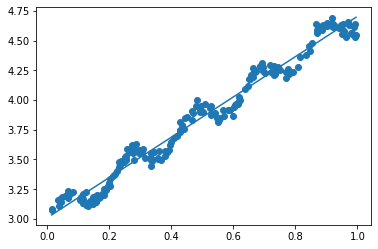

In [6]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
# sort x for plotting regression line
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1], yHat)
plt.show()

通过简单的线性回归，我们计算出该模型的回归方程为 ${y = 3.00774324*1.0 + 1.69532264 * x_1}$

为了对模型效果进行评判，一种方法是计算模型预测值与观测值的相关系数R. 通过 `corrcoef()` 函数，我们可以计算到预测值与观测值十分相似，相关系数约为0.98


In [7]:
yHat = xMat*ws
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

# 局部加权线性回归（Locally Weighted Linear Regression, LWLR）

线性回归的一个问题是可能出现欠拟合现象，这是由于它求的是最小均方误差的无偏估计。因此，有些方法允许在估计中引入一些偏差，降低预测的均方误差，从而获得更好的拟合效果。其中一种方法是局部加权线性回归,该算法解出的回归系数为：

${\hat w = (X^TWX)^{-1}X^TWy}$

对应python代码为：

```python
    ws = xTx.I * (xMat.T * (weights * yMat))

```

其中， ${W}$ 是一个权重矩阵，LWLR通过对每个数据点赋予权重来引入偏差。LWLR一种赋予权重的方式是高斯核（类似于SVM的核），高斯核对应的权重为：

${w(i,i)=exp(\frac{|x^(i)-x|}{-2k^2})}$

```python
for j in range(m):  
        diffMat = testPoint - xMat[j,:]     
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
```

同样，应用上面的数据 `ex0.txt` ，使用LWLR进行建模


In [10]:
yHat = regression.lwlrTest(testArr=xArr, xArr=xArr, yArr=yArr, k=0.003)
yHat[0:4]

array([3.20200665, 3.75940186, 4.53670134, 4.25050564])

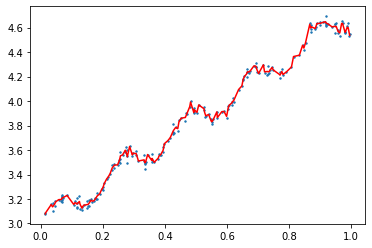

In [12]:
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]
# scatter plot for k=0.003
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0], s=2)
ax.plot(xSort[:,1], yHat[srtInd], c='red')
plt.show()

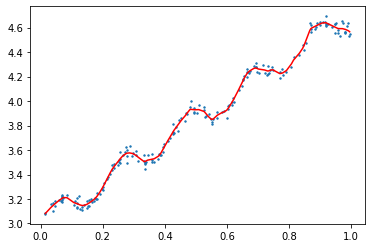

In [13]:
yHat = regression.lwlrTest(testArr=xArr, xArr=xArr, yArr=yArr, k=0.01)
# scatter plot for k=0.01
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0], s=2)
ax.plot(xSort[:,1], yHat[srtInd], c='red')
plt.show()

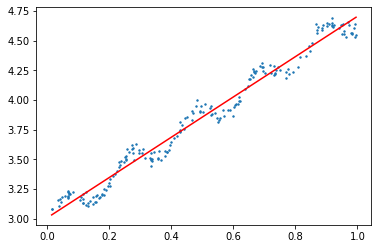

In [14]:
yHat = regression.lwlrTest(testArr=xArr, xArr=xArr, yArr=yArr, k=1.0)
# scatter plot for k=0.01
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0], s=2)
ax.plot(xSort[:,1], yHat[srtInd], c='red')
plt.show()

可以看到改变k值，即改变点的权重，会影响LWLR拟合的情况。在k=0.003时，出现过拟合；k=1.0时，与LR拟合相当；而当k=0.01时，拟合较好，可以还原数据内在的规律。

# 示例：预测鲍鱼的年龄

鲍鱼年龄可以由鲍鱼壳的层数推断。

首先，构建函数 `rssError()` 计算预测误差

```python
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()
```

读入数据 `abalone.txt` 

![](img/img2.png)

总共包含4177个样本

使用0-99个样本作为训练集

In [15]:
abX, abY = regression.loadDataSet('abalone.txt')
yHat01 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1.0)
yHat10 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

计算训练误差

In [16]:
regression.rssError(abY[0:99], yHat01.T)

56.78868743050092

In [17]:
regression.rssError(abY[0:99], yHat1.T)

429.89056187038

In [18]:
regression.rssError(abY[0:99], yHat10.T)

549.1181708827924

使用100-199个样本作为测试集，计算测试误差

In [19]:
yHat01 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
yHat1 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1.0)
yHat10 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)

In [20]:
regression.rssError(abY[100:199], yHat01.T)

57913.51550155911

In [21]:
regression.rssError(abY[100:199], yHat1.T)

573.5261441895982

In [22]:
regression.rssError(abY[100:199], yHat10.T)

517.5711905381903

k=10时，训练误差最大，但测试误差最小。

接下来和LR做个比较

In [23]:
ws = regression.standRegres(abX[0:99], abY[0:99])
yHat = mat(abX[100:199])*ws
regression.rssError(abY[100:199], yHat.T.A)

518.6363153245542

LR在该情况下，与k=10的LWLR表现相当，但k=10也不一定是最优的参数。
> 如果想要更好的预测效果，应该用10个不同的样本集做10次测试来比较

LWLR的问题在于每次都需要对整个数据集进行运算，消耗计算资源


如果特征比样本点多（n > m），即输入矩阵并不是满秩矩阵，而非满秩矩阵求逆时会出现问题。

为了解决这类问题，可以使用正则化的回归方法

# 岭回归（ridge regression）

岭回归就是在矩阵 ${X^TX}$ 上加入 ${\lambda I}$ 而使得矩阵非奇异，进而能对 ${X^TX + \lambda I}$ 求逆。 其中 ${I} $为 ${mxm}$ 的单位矩阵，对角线上元素为1，其他所有元素为0。而 ${\lambda}$ 是人为定义的数值，该算法解出的回归系数为：

${\hat w = (X^TX + \lambda I)^{-1}X^Ty}$

python 实现：

```python
     xTx = xMat.T*xMat
     denom = xTx + eye(shape(xMat)[1])*lam
     ws = denom.I * (xMat.T*yMat)
```
岭回归通过引入 ${\lambda }$ 来限制所有w之和，通过引入该惩罚项，减少不重要的参数

使用鲍鱼示例中所有数据进行岭回归

In [24]:
ridgeWeights = regression.ridgeTest(abX,abY)
ridgeWeights[0:4]

array([[ 0.04304419, -0.02274163,  0.13214088,  0.02075182,  2.22403745,
        -0.99895298, -0.11725424,  0.16622922],
       [ 0.04304419, -0.02274164,  0.13214088,  0.02075182,  2.22403626,
        -0.99895275, -0.11725417,  0.16622934],
       [ 0.04304419, -0.02274164,  0.13214088,  0.02075182,  2.22403305,
        -0.99895211, -0.117254  ,  0.16622966],
       [ 0.04304417, -0.02274166,  0.1321409 ,  0.02075182,  2.22402431,
        -0.99895038, -0.11725354,  0.16623052]])

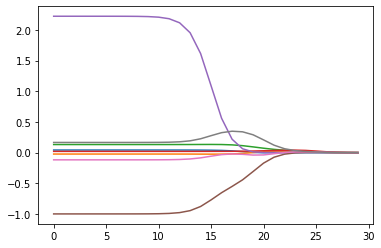

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

# lasso

lasso对回归系数的限定为：

${\sum^n_{k=1} |w_k| \leq \lambda}$



# 小结

- 回归是预测连续型变量的方法。

- 在回归方程里，求得特征对应的最佳回归系数的方法是最小化误差的平方和
